In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
import numpy as np
import tensorflow as tf
from Train import train_w_data

The system is an array of 4 by 4 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a two-D RNN wave function with 16 hidden units and shared weights = False.
W_RNN_0_0:0 (2048,)
b_RNN_0_0:0 (16,)
W_RNN_0_1:0 (2048,)
b_RNN_0_1:0 (16,)
W_RNN_0_2:0 (2048,)
b_RNN_0_2:0 (16,)
W_RNN_0_3:0 (2048,)
b_RNN_0_3:0 (16,)
W_RNN_0_4:0 (2048,)
b_RNN_0_4:0 (16,)
W_RNN_0_5:0 (2048,)
b_RNN_0_5:0 (16,)
W_RNN_0_6:0 (2048,)
b_RNN_0_6:0 (16,)
W_RNN_0_7:0 (2048,)
b_RNN_0_7:0 (16,)
W_RNN_0_8:0 (2048,)
b_RNN_0_8:0 (16,)
W_RNN_0_9:0 (2048,)
b_RNN_0_9:0 (16,)
W_RNN_0_10:0 (2048,)
b_RNN_0_10:0 (16,)
W_RNN_0_11:0 (2048,)
b_RNN_0_11:0 (16,)
W_RNN_0_12:0 (2048,)
b_RNN_0_12:0 (16,)
W_RNN_0_13:0 (2048,)
b_RNN_0_13:0 (16,)
W_RNN_0_14:0 (2048,)
b_RNN_0_14:0 (16,)
W_RNN_0_15:0 (2048,)
b_RNN_0_15:0 (16,)
RNNWF_dense_0/kernel:0 (32,)
RNNWF_dense_0/bias:0 (2,)
RNNWF_dense_1/kernel:0 (32,)
RNNWF_dense_1/bias:0 (2,)
RNNWF_dense_2/kernel:0 (32,)
RNNWF_dense_2/bias:0 (2,)
RNNWF_dense_3/ker

Step #95
Energy = -0.5397175550460815
Variance = 14.090387344360352
 
Step #96
Energy = -0.49286267161369324
Variance = 7.067224025726318
 
Step #97
Energy = -1.6918888092041016
Variance = 23109.6875
 
Step #98
Energy = -0.4906884729862213
Variance = 5.026050567626953
 
Step #99
Energy = -0.5441856980323792
Variance = 61.64945983886719
 
Step #100
Energy = -0.49345600605010986
Variance = 10.318017959594727
 


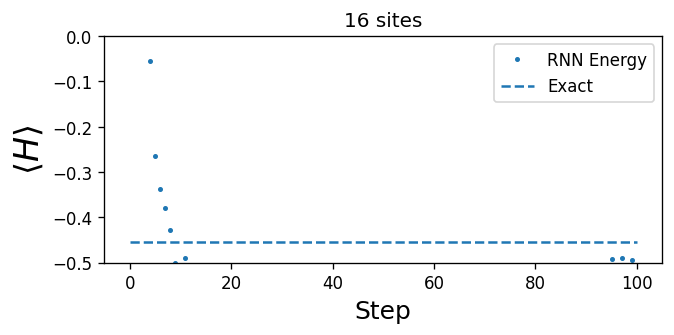

Final Energy -0.7201862467659844 (Exact Energy is -0.4534132086591546)
Final Error after 100 epochs is 0.26677303810682984


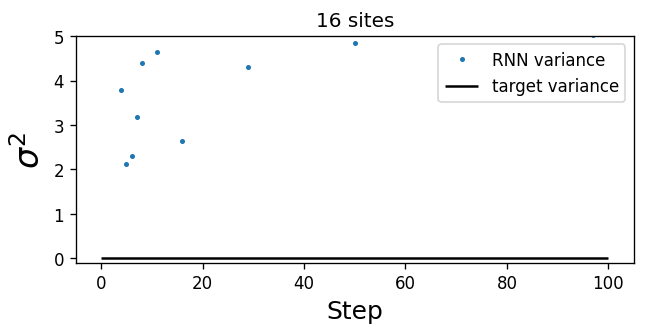

Final Variance after 100 epochs is 3257.9070178667703


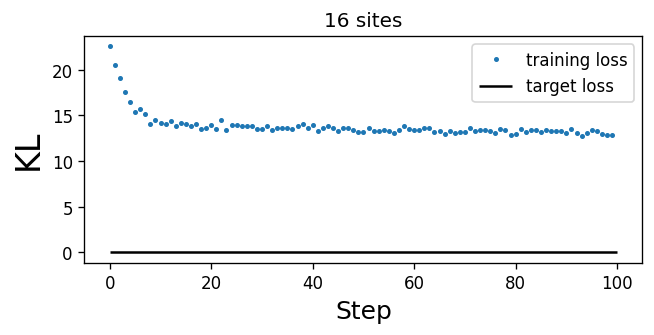

In [46]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 4,
        'Ly': 4,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'TwoD',
        'nh': 16, 
        'lr': 1e-3, 
        'weight_sharing': False,
        'seed': 1234,
        'epochs':100,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()

The system is an array of 4 by 4 Rydberg Atoms.
The experimental parameters are: V = 7, delta = 1.0, Omega = 1.0.
Training a one-D RNN wave function with 8 hidden units and shared weights.
gru_2/gru_cell_2/kernel:0 (48,)
gru_2/gru_cell_2/recurrent_kernel:0 (192,)
gru_2/gru_cell_2/bias:0 (48,)
dense_4/kernel:0 (16,)
dense_4/bias:0 (2,)
The sum of params is 306
Step #1
Energy = 0.7698625922203064
Variance = 18.85716438293457
 
Step #2
Energy = 0.48746636509895325
Variance = 13.609466552734375
 
Step #3
Energy = 0.3231787085533142
Variance = 10.826761245727539
 
Step #4
Energy = 0.16371102631092072
Variance = 7.92612886428833
 
Step #5
Energy = 0.06777030974626541
Variance = 7.098628997802734
 
Step #6
Energy = 0.010860946029424667
Variance = 6.305022716522217
 
Step #7
Energy = 0.016615035012364388
Variance = 5.822830677032471
 
Step #8
Energy = -0.04935157671570778
Variance = 5.228625297546387
 
Step #9
Energy = -0.02276037074625492
Variance = 5.044839859008789
 
Step #10
Energy = -0.05

Step #113
Energy = -0.36217737197875977
Variance = 0.578870415687561
 
Step #114
Energy = -0.3641475737094879
Variance = 0.6383524537086487
 
Step #115
Energy = -0.370376855134964
Variance = 0.5522313714027405
 
Step #116
Energy = -0.365682989358902
Variance = 0.5397157073020935
 
Step #117
Energy = -0.3763394057750702
Variance = 0.4827059209346771
 
Step #118
Energy = -0.36857178807258606
Variance = 0.574033796787262
 
Step #119
Energy = -0.37711697816848755
Variance = 0.5228145718574524
 
Step #120
Energy = -0.3790549337863922
Variance = 0.4571094214916229
 
Step #121
Energy = -0.3721430003643036
Variance = 0.48678699135780334
 
Step #122
Energy = -0.37425559759140015
Variance = 0.5113991498947144
 
Step #123
Energy = -0.3766283094882965
Variance = 0.45894092321395874
 
Step #124
Energy = -0.378937691450119
Variance = 0.4483124613761902
 
Step #125
Energy = -0.3804798424243927
Variance = 0.4923127293586731
 
Step #126
Energy = -0.3769465684890747
Variance = 0.4768863022327423
 
Step 

Step #228
Energy = -0.4000639319419861
Variance = 0.306999146938324
 
Step #229
Energy = -0.3998281955718994
Variance = 0.31689995527267456
 
Step #230
Energy = -0.3885938823223114
Variance = 0.33603760600090027
 
Step #231
Energy = -0.4027957618236542
Variance = 0.2979825437068939
 
Step #232
Energy = -0.40655964612960815
Variance = 0.2856089770793915
 
Step #233
Energy = -0.40358486771583557
Variance = 0.27945202589035034
 
Step #234
Energy = -0.3966839611530304
Variance = 0.32089415192604065
 
Step #235
Energy = -0.39693111181259155
Variance = 0.3044019639492035
 
Step #236
Energy = -0.400299608707428
Variance = 0.3132043778896332
 
Step #237
Energy = -0.4027708172798157
Variance = 0.31342408061027527
 
Step #238
Energy = -0.39537274837493896
Variance = 0.32688140869140625
 
Step #239
Energy = -0.4001311659812927
Variance = 0.29705533385276794
 
Step #240
Energy = -0.39885008335113525
Variance = 0.308437317609787
 
Step #241
Energy = -0.4016427993774414
Variance = 0.3265387713909149

Step #342
Energy = -0.4150647819042206
Variance = 0.2084556519985199
 
Step #343
Energy = -0.41369643807411194
Variance = 0.22631151974201202
 
Step #344
Energy = -0.4073546826839447
Variance = 0.26278284192085266
 
Step #345
Energy = -0.41102439165115356
Variance = 0.23554913699626923
 
Step #346
Energy = -0.4139861464500427
Variance = 0.24380336701869965
 
Step #347
Energy = -0.4089285135269165
Variance = 0.2477881759405136
 
Step #348
Energy = -0.41012826561927795
Variance = 0.22471830248832703
 
Step #349
Energy = -0.4107588827610016
Variance = 0.23032772541046143
 
Step #350
Energy = -0.4103448688983917
Variance = 0.25128909945487976
 
Step #351
Energy = -0.410468190908432
Variance = 0.24714075028896332
 
Step #352
Energy = -0.4097350537776947
Variance = 0.26539936661720276
 
Step #353
Energy = -0.41238147020339966
Variance = 0.26200079917907715
 
Step #354
Energy = -0.4178258180618286
Variance = 0.21083174645900726
 
Step #355
Energy = -0.4152821898460388
Variance = 0.23184122145

Step #457
Energy = -0.4143938422203064
Variance = 0.24830351769924164
 
Step #458
Energy = -0.41906431317329407
Variance = 0.21167542040348053
 
Step #459
Energy = -0.4136691391468048
Variance = 0.23196518421173096
 
Step #460
Energy = -0.41237056255340576
Variance = 0.23836258053779602
 
Step #461
Energy = -0.41053593158721924
Variance = 0.23136310279369354
 
Step #462
Energy = -0.4124701917171478
Variance = 0.222246915102005
 
Step #463
Energy = -0.4106052815914154
Variance = 0.2149607241153717
 
Step #464
Energy = -0.41095608472824097
Variance = 0.23857003450393677
 
Step #465
Energy = -0.4106977581977844
Variance = 0.2258146107196808
 
Step #466
Energy = -0.41329312324523926
Variance = 0.24858349561691284
 
Step #467
Energy = -0.4133778512477875
Variance = 0.19877012073993683
 
Step #468
Energy = -0.4128699004650116
Variance = 0.240666925907135
 
Step #469
Energy = -0.4174906611442566
Variance = 0.21364833414554596
 
Step #470
Energy = -0.4162800908088684
Variance = 0.2176324427127

Step #571
Energy = -0.4252435564994812
Variance = 0.1794111132621765
 
Step #572
Energy = -0.42138952016830444
Variance = 0.1756441593170166
 
Step #573
Energy = -0.4205824136734009
Variance = 0.21627283096313477
 
Step #574
Energy = -0.41423189640045166
Variance = 0.2113189399242401
 
Step #575
Energy = -0.41525185108184814
Variance = 0.21425949037075043
 
Step #576
Energy = -0.411774218082428
Variance = 0.20339614152908325
 
Step #577
Energy = -0.41899585723876953
Variance = 0.19868282973766327
 
Step #578
Energy = -0.4180845022201538
Variance = 0.2117869257926941
 
Step #579
Energy = -0.42336219549179077
Variance = 0.21092569828033447
 
Step #580
Energy = -0.41771399974823
Variance = 0.20745305716991425
 
Step #581
Energy = -0.42120227217674255
Variance = 0.21321751177310944
 
Step #582
Energy = -0.41921478509902954
Variance = 0.2170170098543167
 
Step #583
Energy = -0.41979822516441345
Variance = 0.20474258065223694
 
Step #584
Energy = -0.42575013637542725
Variance = 0.15839479863

Step #685
Energy = -0.4222003221511841
Variance = 0.177379310131073
 
Step #686
Energy = -0.4253842830657959
Variance = 0.1818562000989914
 
Step #687
Energy = -0.42942485213279724
Variance = 0.1735595464706421
 
Step #688
Energy = -0.4215551018714905
Variance = 0.19279544055461884
 
Step #689
Energy = -0.4197710454463959
Variance = 0.19253095984458923
 
Step #690
Energy = -0.4207298457622528
Variance = 0.18282578885555267
 
Step #691
Energy = -0.4275163412094116
Variance = 0.1853855848312378
 
Step #692
Energy = -0.42675453424453735
Variance = 0.18986718356609344
 
Step #693
Energy = -0.4282867908477783
Variance = 0.14635640382766724
 
Step #694
Energy = -0.42196038365364075
Variance = 0.17796817421913147
 
Step #695
Energy = -0.42273515462875366
Variance = 0.1970188319683075
 
Step #696
Energy = -0.4240987002849579
Variance = 0.16933651268482208
 
Step #697
Energy = -0.42206114530563354
Variance = 0.21880191564559937
 
Step #698
Energy = -0.4217231571674347
Variance = 0.1800477653741

Step #799
Energy = -0.4295436441898346
Variance = 0.1617373675107956
 
Step #800
Energy = -0.4290870428085327
Variance = 0.15483075380325317
 
Step #801
Energy = -0.42789578437805176
Variance = 0.14855057001113892
 
Step #802
Energy = -0.43205541372299194
Variance = 0.16056911647319794
 
Step #803
Energy = -0.4305908679962158
Variance = 0.16383716464042664
 
Step #804
Energy = -0.42363283038139343
Variance = 0.18799923360347748
 
Step #805
Energy = -0.4273211359977722
Variance = 0.18460632860660553
 
Step #806
Energy = -0.42644137144088745
Variance = 0.23776981234550476
 
Step #807
Energy = -0.4270818531513214
Variance = 0.15055495500564575
 
Step #808
Energy = -0.42871642112731934
Variance = 0.14996670186519623
 
Step #809
Energy = -0.4334500730037689
Variance = 0.11590910702943802
 
Step #810
Energy = -0.4300250709056854
Variance = 0.16276875138282776
 
Step #811
Energy = -0.4276537597179413
Variance = 0.17094162106513977
 
Step #812
Energy = -0.4246775507926941
Variance = 0.15939211

Step #913
Energy = -0.4295395612716675
Variance = 0.1632811576128006
 
Step #914
Energy = -0.42678138613700867
Variance = 0.17501361668109894
 
Step #915
Energy = -0.42679160833358765
Variance = 0.14027026295661926
 
Step #916
Energy = -0.4306643009185791
Variance = 0.14038719236850739
 
Step #917
Energy = -0.4296870827674866
Variance = 0.1347816437482834
 
Step #918
Energy = -0.4264053404331207
Variance = 0.15962140262126923
 
Step #919
Energy = -0.4319060444831848
Variance = 0.1234133169054985
 
Step #920
Energy = -0.4272858202457428
Variance = 0.1527067869901657
 
Step #921
Energy = -0.42863866686820984
Variance = 0.1634790003299713
 
Step #922
Energy = -0.4292270243167877
Variance = 0.13970747590065002
 
Step #923
Energy = -0.42843616008758545
Variance = 0.1563595086336136
 
Step #924
Energy = -0.4286930561065674
Variance = 0.1515984684228897
 
Step #925
Energy = -0.4321179687976837
Variance = 0.1417929232120514
 
Step #926
Energy = -0.43140897154808044
Variance = 0.153671562671661

Step #1027
Energy = -0.4335018992424011
Variance = 0.12400336563587189
 
Step #1028
Energy = -0.432167649269104
Variance = 0.14800070226192474
 
Step #1029
Energy = -0.42735180258750916
Variance = 0.16169404983520508
 
Step #1030
Energy = -0.43350130319595337
Variance = 0.12475993484258652
 
Step #1031
Energy = -0.4238119125366211
Variance = 0.14799712598323822
 
Step #1032
Energy = -0.430030882358551
Variance = 0.17007464170455933
 
Step #1033
Energy = -0.43400853872299194
Variance = 0.14101797342300415
 
Step #1034
Energy = -0.42978498339653015
Variance = 0.19158318638801575
 
Step #1035
Energy = -0.4302709102630615
Variance = 0.16967223584651947
 
Step #1036
Energy = -0.4310345947742462
Variance = 0.13756076991558075
 
Step #1037
Energy = -0.43304669857025146
Variance = 0.13411517441272736
 
Step #1038
Energy = -0.426604300737381
Variance = 0.16703134775161743
 
Step #1039
Energy = -0.430057555437088
Variance = 0.12490184605121613
 
Step #1040
Energy = -0.42938393354415894
Variance 

Step #1139
Energy = -0.4296886622905731
Variance = 0.15277887880802155
 
Step #1140
Energy = -0.4297868013381958
Variance = 0.14947062730789185
 
Step #1141
Energy = -0.42946362495422363
Variance = 0.15611162781715393
 
Step #1142
Energy = -0.4337855279445648
Variance = 0.13678233325481415
 
Step #1143
Energy = -0.428014874458313
Variance = 0.14800280332565308
 
Step #1144
Energy = -0.43127673864364624
Variance = 0.11339578032493591
 
Step #1145
Energy = -0.43124812841415405
Variance = 0.16825009882450104
 
Step #1146
Energy = -0.43227311968803406
Variance = 0.15703074634075165
 
Step #1147
Energy = -0.4320383071899414
Variance = 0.13131487369537354
 
Step #1148
Energy = -0.43894678354263306
Variance = 0.10137566179037094
 
Step #1149
Energy = -0.430007666349411
Variance = 0.15447072684764862
 
Step #1150
Energy = -0.43186092376708984
Variance = 0.12009546160697937
 
Step #1151
Energy = -0.4338739514350891
Variance = 0.1156744658946991
 
Step #1152
Energy = -0.43769195675849915
Varianc

Step #1252
Energy = -0.43644610047340393
Variance = 0.09737400710582733
 
Step #1253
Energy = -0.4332123100757599
Variance = 0.1086484044790268
 
Step #1254
Energy = -0.43318045139312744
Variance = 0.16796767711639404
 
Step #1255
Energy = -0.4274332821369171
Variance = 0.14290796220302582
 
Step #1256
Energy = -0.42970702052116394
Variance = 0.18495044112205505
 
Step #1257
Energy = -0.43236467242240906
Variance = 0.1104150116443634
 
Step #1258
Energy = -0.4341632127761841
Variance = 0.13741539418697357
 
Step #1259
Energy = -0.4313121736049652
Variance = 0.14898832142353058
 
Step #1260
Energy = -0.4259669780731201
Variance = 0.12894582748413086
 
Step #1261
Energy = -0.42898064851760864
Variance = 0.1191905215382576
 
Step #1262
Energy = -0.4313351511955261
Variance = 0.14704954624176025
 
Step #1263
Energy = -0.4243614375591278
Variance = 0.17945002019405365
 
Step #1264
Energy = -0.43119630217552185
Variance = 0.1303759664297104
 
Step #1265
Energy = -0.4241337478160858
Variance 

Step #1365
Energy = -0.4312783181667328
Variance = 0.1325821876525879
 
Step #1366
Energy = -0.427811861038208
Variance = 0.21280346810817719
 
Step #1367
Energy = -0.43033602833747864
Variance = 0.13936807215213776
 
Step #1368
Energy = -0.42741867899894714
Variance = 0.21190273761749268
 
Step #1369
Energy = -0.4264342188835144
Variance = 0.185623899102211
 
Step #1370
Energy = -0.4317542016506195
Variance = 0.1781718134880066
 
Step #1371
Energy = -0.4302290976047516
Variance = 0.13524046540260315
 
Step #1372
Energy = -0.4321306645870209
Variance = 0.12976649403572083
 
Step #1373
Energy = -0.4335586428642273
Variance = 0.11049342155456543
 
Step #1374
Energy = -0.4310303330421448
Variance = 0.15909484028816223
 
Step #1375
Energy = -0.43282032012939453
Variance = 0.13371892273426056
 
Step #1376
Energy = -0.43241775035858154
Variance = 0.125888854265213
 
Step #1377
Energy = -0.43134093284606934
Variance = 0.12611398100852966
 
Step #1378
Energy = -0.4317629337310791
Variance = 0.

Step #1479
Energy = -0.43403396010398865
Variance = 0.10995303094387054
 
Step #1480
Energy = -0.434988409280777
Variance = 0.12356312572956085
 
Step #1481
Energy = -0.4307129979133606
Variance = 0.12147675454616547
 
Step #1482
Energy = -0.4312160611152649
Variance = 0.15592150390148163
 
Step #1483
Energy = -0.42721909284591675
Variance = 0.1780814379453659
 
Step #1484
Energy = -0.4376104772090912
Variance = 0.20126721262931824
 
Step #1485
Energy = -0.4276297986507416
Variance = 0.16661718487739563
 
Step #1486
Energy = -0.43498125672340393
Variance = 0.14074954390525818
 
Step #1487
Energy = -0.4299304485321045
Variance = 0.161808043718338
 
Step #1488
Energy = -0.43542352318763733
Variance = 0.13438007235527039
 
Step #1489
Energy = -0.4333764910697937
Variance = 0.12155736982822418
 
Step #1490
Energy = -0.432431697845459
Variance = 0.18572326004505157
 
Step #1491
Energy = -0.4343728721141815
Variance = 0.11180523782968521
 
Step #1492
Energy = -0.4345654845237732
Variance = 0

Step #1592
Energy = -0.4274909198284149
Variance = 0.1993066668510437
 
Step #1593
Energy = -0.42782866954803467
Variance = 0.18340831995010376
 
Step #1594
Energy = -0.4340168535709381
Variance = 0.1456853449344635
 
Step #1595
Energy = -0.4305303394794464
Variance = 0.22730489075183868
 
Step #1596
Energy = -0.4314333498477936
Variance = 0.1324327439069748
 
Step #1597
Energy = -0.4320925176143646
Variance = 0.13850469887256622
 
Step #1598
Energy = -0.4259490966796875
Variance = 0.1782871037721634
 
Step #1599
Energy = -0.42898574471473694
Variance = 0.15240152180194855
 
Step #1600
Energy = -0.432209849357605
Variance = 0.12280039489269257
 
Step #1601
Energy = -0.4357927739620209
Variance = 0.17475903034210205
 
Step #1602
Energy = -0.4372353255748749
Variance = 0.11914776265621185
 
Step #1603
Energy = -0.43800270557403564
Variance = 0.13205072283744812
 
Step #1604
Energy = -0.4315708875656128
Variance = 0.11914899945259094
 
Step #1605
Energy = -0.42395052313804626
Variance = 0

Step #1705
Energy = -0.430245965719223
Variance = 0.1687919646501541
 
Step #1706
Energy = -0.4321559965610504
Variance = 0.15257367491722107
 
Step #1707
Energy = -0.4290236234664917
Variance = 0.17872340977191925
 
Step #1708
Energy = -0.43484076857566833
Variance = 0.10960549861192703
 
Step #1709
Energy = -0.431029349565506
Variance = 0.144399031996727
 
Step #1710
Energy = -0.42887553572654724
Variance = 0.13406792283058167
 
Step #1711
Energy = -0.4275806248188019
Variance = 0.1337355524301529
 
Step #1712
Energy = -0.42642641067504883
Variance = 0.1722278892993927
 
Step #1713
Energy = -0.4297797977924347
Variance = 0.1311054825782776
 
Step #1714
Energy = -0.42949819564819336
Variance = 0.16595371067523956
 
Step #1715
Energy = -0.42474547028541565
Variance = 0.16250766813755035
 
Step #1716
Energy = -0.43136394023895264
Variance = 0.16267508268356323
 
Step #1717
Energy = -0.4290405213832855
Variance = 0.17802485823631287
 
Step #1718
Energy = -0.4323025643825531
Variance = 0.

Step #1818
Energy = -0.4322819113731384
Variance = 0.10840857028961182
 
Step #1819
Energy = -0.43436384201049805
Variance = 0.17418740689754486
 
Step #1820
Energy = -0.43511566519737244
Variance = 0.1462828665971756
 
Step #1821
Energy = -0.4329473078250885
Variance = 0.12196752429008484
 
Step #1822
Energy = -0.4293304979801178
Variance = 0.1505630761384964
 
Step #1823
Energy = -0.43459784984588623
Variance = 0.12361124902963638
 
Step #1824
Energy = -0.43017643690109253
Variance = 0.12771384418010712
 
Step #1825
Energy = -0.43120676279067993
Variance = 0.14958438277244568
 
Step #1826
Energy = -0.4240286648273468
Variance = 0.15678100287914276
 
Step #1827
Energy = -0.43136653304100037
Variance = 0.14073507487773895
 
Step #1828
Energy = -0.42681556940078735
Variance = 0.1547887921333313
 
Step #1829
Energy = -0.43556636571884155
Variance = 0.113550566136837
 
Step #1830
Energy = -0.4293915331363678
Variance = 0.1459057629108429
 
Step #1831
Energy = -0.43310949206352234
Variance

Step #1931
Energy = -0.4298206865787506
Variance = 0.17691797018051147
 
Step #1932
Energy = -0.4277893602848053
Variance = 0.14155887067317963
 
Step #1933
Energy = -0.43142181634902954
Variance = 0.1400720477104187
 
Step #1934
Energy = -0.4314180016517639
Variance = 0.13748787343502045
 
Step #1935
Energy = -0.4237193465232849
Variance = 0.14369481801986694
 
Step #1936
Energy = -0.43098586797714233
Variance = 0.21760991215705872
 
Step #1937
Energy = -0.43918538093566895
Variance = 0.16428643465042114
 
Step #1938
Energy = -0.4342605173587799
Variance = 0.13697728514671326
 
Step #1939
Energy = -0.4396931827068329
Variance = 0.34967705607414246
 
Step #1940
Energy = -0.43036937713623047
Variance = 0.14549075067043304
 
Step #1941
Energy = -0.4319456219673157
Variance = 0.14484722912311554
 
Step #1942
Energy = -0.42892682552337646
Variance = 0.15633901953697205
 
Step #1943
Energy = -0.4344775676727295
Variance = 0.0944257453083992
 
Step #1944
Energy = -0.4268266260623932
Variance

Step #2045
Energy = -0.43496373295783997
Variance = 0.11143016070127487
 
Step #2046
Energy = -0.43258553743362427
Variance = 0.1876310557126999
 
Step #2047
Energy = -0.4331097900867462
Variance = 0.15076130628585815
 
Step #2048
Energy = -0.4233468770980835
Variance = 0.18866339325904846
 
Step #2049
Energy = -0.4339407980442047
Variance = 0.17326074838638306
 
Step #2050
Energy = -0.4308377206325531
Variance = 0.22019682824611664
 
Step #2051
Energy = -0.43071433901786804
Variance = 0.250729501247406
 
Step #2052
Energy = -0.4260299503803253
Variance = 0.25653865933418274
 
Step #2053
Energy = -0.43128880858421326
Variance = 0.20431096851825714
 
Step #2054
Energy = -0.44208723306655884
Variance = 0.22637954354286194
 
Step #2055
Energy = -0.42958661913871765
Variance = 0.1940115988254547
 
Step #2056
Energy = -0.4338427186012268
Variance = 0.1412992924451828
 
Step #2057
Energy = -0.4305356442928314
Variance = 0.1894521862268448
 
Step #2058
Energy = -0.42594996094703674
Variance =

Step #2159
Energy = -0.4327821731567383
Variance = 0.1438935548067093
 
Step #2160
Energy = -0.4312422573566437
Variance = 0.13789023458957672
 
Step #2161
Energy = -0.4283651113510132
Variance = 0.14476458728313446
 
Step #2162
Energy = -0.43400588631629944
Variance = 0.15681684017181396
 
Step #2163
Energy = -0.42755818367004395
Variance = 0.14931802451610565
 
Step #2164
Energy = -0.4379573464393616
Variance = 0.10417483001947403
 
Step #2165
Energy = -0.42816057801246643
Variance = 0.21220621466636658
 
Step #2166
Energy = -0.4289487898349762
Variance = 0.17475193738937378
 
Step #2167
Energy = -0.4334615170955658
Variance = 0.13026131689548492
 
Step #2168
Energy = -0.4310966432094574
Variance = 0.15120695531368256
 
Step #2169
Energy = -0.43328383564949036
Variance = 0.14053304493427277
 
Step #2170
Energy = -0.4272051453590393
Variance = 0.16669446229934692
 
Step #2171
Energy = -0.43240007758140564
Variance = 0.15563440322875977
 
Step #2172
Energy = -0.4269527494907379
Varianc

Step #2272
Energy = -0.4234035611152649
Variance = 0.1728716790676117
 
Step #2273
Energy = -0.4282098710536957
Variance = 0.16928112506866455
 
Step #2274
Energy = -0.4319625794887543
Variance = 0.16454629600048065
 
Step #2275
Energy = -0.4315151274204254
Variance = 0.24095192551612854
 
Step #2276
Energy = -0.43164727091789246
Variance = 0.171196848154068
 
Step #2277
Energy = -0.4285584092140198
Variance = 0.14887753129005432
 
Step #2278
Energy = -0.43093958497047424
Variance = 0.13230936229228973
 
Step #2279
Energy = -0.4318549931049347
Variance = 0.10524816811084747
 
Step #2280
Energy = -0.4335247576236725
Variance = 0.16343185305595398
 
Step #2281
Energy = -0.43077459931373596
Variance = 0.14935632050037384
 
Step #2282
Energy = -0.4315098226070404
Variance = 0.10389521718025208
 
Step #2283
Energy = -0.4352623224258423
Variance = 0.18848741054534912
 
Step #2284
Energy = -0.43142998218536377
Variance = 0.14745301008224487
 
Step #2285
Energy = -0.4334135055541992
Variance =

Step #2386
Energy = -0.432948499917984
Variance = 0.1257043182849884
 
Step #2387
Energy = -0.427668035030365
Variance = 0.1516461819410324
 
Step #2388
Energy = -0.430539071559906
Variance = 0.23813773691654205
 
Step #2389
Energy = -0.42938774824142456
Variance = 0.13866908848285675
 
Step #2390
Energy = -0.42867356538772583
Variance = 0.1819646805524826
 
Step #2391
Energy = -0.4303985834121704
Variance = 0.19550977647304535
 
Step #2392
Energy = -0.4309483766555786
Variance = 0.14455637335777283
 
Step #2393
Energy = -0.4334094226360321
Variance = 0.25142809748649597
 
Step #2394
Energy = -0.42839178442955017
Variance = 0.1709689050912857
 
Step #2395
Energy = -0.4254028797149658
Variance = 0.20746822655200958
 
Step #2396
Energy = -0.4291436970233917
Variance = 0.12875236570835114
 
Step #2397
Energy = -0.4352475106716156
Variance = 0.20753277838230133
 
Step #2398
Energy = -0.4283076822757721
Variance = 0.17017196118831635
 
Step #2399
Energy = -0.43010613322257996
Variance = 0.1

Step #2499
Energy = -0.429720014333725
Variance = 0.14154411852359772
 
Step #2500
Energy = -0.43072208762168884
Variance = 0.14090056717395782
 
Step #2501
Energy = -0.4263206124305725
Variance = 0.1653623729944229
 
Step #2502
Energy = -0.42762595415115356
Variance = 0.14518246054649353
 
Step #2503
Energy = -0.42755675315856934
Variance = 0.1906759887933731
 
Step #2504
Energy = -0.4348909556865692
Variance = 0.12838439643383026
 
Step #2505
Energy = -0.4293579161167145
Variance = 0.18270243704319
 
Step #2506
Energy = -0.4291747212409973
Variance = 0.1748429536819458
 
Step #2507
Energy = -0.4283049702644348
Variance = 0.17062725126743317
 
Step #2508
Energy = -0.43485626578330994
Variance = 0.15153856575489044
 
Step #2509
Energy = -0.42858535051345825
Variance = 0.13534045219421387
 
Step #2510
Energy = -0.42879900336265564
Variance = 0.23545563220977783
 
Step #2511
Energy = -0.42950713634490967
Variance = 0.16324207186698914
 
Step #2512
Energy = -0.42640212178230286
Variance =

Step #2613
Energy = -0.42611703276634216
Variance = 0.21245473623275757
 
Step #2614
Energy = -0.43331918120384216
Variance = 0.1584143042564392
 
Step #2615
Energy = -0.4306815266609192
Variance = 0.11996174603700638
 
Step #2616
Energy = -0.428862601518631
Variance = 0.14847692847251892
 
Step #2617
Energy = -0.4333954155445099
Variance = 0.14979007840156555
 
Step #2618
Energy = -0.4260735511779785
Variance = 0.18332231044769287
 
Step #2619
Energy = -0.4256962835788727
Variance = 0.24659425020217896
 
Step #2620
Energy = -0.4286639392375946
Variance = 0.17459195852279663
 
Step #2621
Energy = -0.4336543679237366
Variance = 0.14182999730110168
 
Step #2622
Energy = -0.42058664560317993
Variance = 0.1893572360277176
 
Step #2623
Energy = -0.42843151092529297
Variance = 0.17422151565551758
 
Step #2624
Energy = -0.4342803657054901
Variance = 0.16157056391239166
 
Step #2625
Energy = -0.42458483576774597
Variance = 0.1595550775527954
 
Step #2626
Energy = -0.43333593010902405
Variance 

Step #2726
Energy = -0.4265049993991852
Variance = 0.1503913551568985
 
Step #2727
Energy = -0.4288417398929596
Variance = 0.15909789502620697
 
Step #2728
Energy = -0.4311881959438324
Variance = 0.15573039650917053
 
Step #2729
Energy = -0.4265996813774109
Variance = 0.15824750065803528
 
Step #2730
Energy = -0.42879238724708557
Variance = 0.17957176268100739
 
Step #2731
Energy = -0.4300883710384369
Variance = 0.1560370922088623
 
Step #2732
Energy = -0.42915841937065125
Variance = 0.15623342990875244
 
Step #2733
Energy = -0.4360485374927521
Variance = 0.29540976881980896
 
Step #2734
Energy = -0.43057239055633545
Variance = 0.17303566634655
 
Step #2735
Energy = -0.43146637082099915
Variance = 0.5927740335464478
 
Step #2736
Energy = -0.43166783452033997
Variance = 0.1320670247077942
 
Step #2737
Energy = -0.42996978759765625
Variance = 0.1993567794561386
 
Step #2738
Energy = -0.4286048114299774
Variance = 0.1772552728652954
 
Step #2739
Energy = -0.43055394291877747
Variance = 0.

Step #2839
Energy = -0.427147775888443
Variance = 0.2103634923696518
 
Step #2840
Energy = -0.4252372086048126
Variance = 0.15288101136684418
 
Step #2841
Energy = -0.4296439588069916
Variance = 0.1538511961698532
 
Step #2842
Energy = -0.4314815104007721
Variance = 0.14477315545082092
 
Step #2843
Energy = -0.42398908734321594
Variance = 0.21380376815795898
 
Step #2844
Energy = -0.42407575249671936
Variance = 0.1522323340177536
 
Step #2845
Energy = -0.4247031509876251
Variance = 0.21104669570922852
 
Step #2846
Energy = -0.4328574538230896
Variance = 0.12245377898216248
 
Step #2847
Energy = -0.4311365485191345
Variance = 0.13751168549060822
 
Step #2848
Energy = -0.43229714035987854
Variance = 0.17145225405693054
 
Step #2849
Energy = -0.4300087094306946
Variance = 0.16023343801498413
 
Step #2850
Energy = -0.42799779772758484
Variance = 0.12478107959032059
 
Step #2851
Energy = -0.42768728733062744
Variance = 0.13720986247062683
 
Step #2852
Energy = -0.4281652867794037
Variance =

Step #2953
Energy = -0.42554575204849243
Variance = 0.17134054005146027
 
Step #2954
Energy = -0.43170949816703796
Variance = 0.11479078978300095
 
Step #2955
Energy = -0.4285927712917328
Variance = 0.21403491497039795
 
Step #2956
Energy = -0.4264988303184509
Variance = 0.22991354763507843
 
Step #2957
Energy = -0.4279608726501465
Variance = 0.1382627785205841
 
Step #2958
Energy = -0.4261068105697632
Variance = 0.2017982304096222
 
Step #2959
Energy = -0.42402809858322144
Variance = 0.1972695142030716
 
Step #2960
Energy = -0.4238927364349365
Variance = 0.22481830418109894
 
Step #2961
Energy = -0.42310914397239685
Variance = 0.19099673628807068
 
Step #2962
Energy = -0.4253917336463928
Variance = 0.16436922550201416
 
Step #2963
Energy = -0.42587873339653015
Variance = 0.17227505147457123
 
Step #2964
Energy = -0.4362719655036926
Variance = 0.1571783572435379
 
Step #2965
Energy = -0.42493537068367004
Variance = 0.1771589070558548
 
Step #2966
Energy = -0.425694078207016
Variance = 

Step #3066
Energy = -0.42861413955688477
Variance = 0.15161041915416718
 
Step #3067
Energy = -0.4286615550518036
Variance = 0.19462667405605316
 
Step #3068
Energy = -0.42442595958709717
Variance = 0.16393499076366425
 
Step #3069
Energy = -0.4277689456939697
Variance = 0.12723055481910706
 
Step #3070
Energy = -0.4267273545265198
Variance = 0.18667280673980713
 
Step #3071
Energy = -0.4246794581413269
Variance = 0.16056127846240997
 
Step #3072
Energy = -0.42707738280296326
Variance = 0.175044983625412
 
Step #3073
Energy = -0.4233022928237915
Variance = 0.14878283441066742
 
Step #3074
Energy = -0.4291600286960602
Variance = 0.1312737762928009
 
Step #3075
Energy = -0.42701396346092224
Variance = 0.16674666106700897
 
Step #3076
Energy = -0.42580151557922363
Variance = 0.14006605744361877
 
Step #3077
Energy = -0.4287656247615814
Variance = 0.16947247087955475
 
Step #3078
Energy = -0.42552995681762695
Variance = 0.1560075432062149
 
Step #3079
Energy = -0.4209403693675995
Variance 

Step #3179
Energy = -0.4248444736003876
Variance = 0.20334500074386597
 
Step #3180
Energy = -0.4240395128726959
Variance = 0.21392077207565308
 
Step #3181
Energy = -0.42557886242866516
Variance = 0.20838895440101624
 
Step #3182
Energy = -0.4204587936401367
Variance = 0.18554489314556122
 
Step #3183
Energy = -0.4295464754104614
Variance = 0.1652074009180069
 
Step #3184
Energy = -0.4266713261604309
Variance = 0.2786884009838104
 
Step #3185
Energy = -0.4303448498249054
Variance = 0.14478792250156403
 
Step #3186
Energy = -0.43102478981018066
Variance = 0.1663363128900528
 
Step #3187
Energy = -0.4288586974143982
Variance = 0.15466268360614777
 
Step #3188
Energy = -0.4278576970100403
Variance = 0.13564755022525787
 
Step #3189
Energy = -0.42863360047340393
Variance = 0.17772193253040314
 
Step #3190
Energy = -0.42812755703926086
Variance = 0.13122396171092987
 
Step #3191
Energy = -0.4269990921020508
Variance = 0.17638379335403442
 
Step #3192
Energy = -0.4338283836841583
Variance =

Step #3293
Energy = -0.42907193303108215
Variance = 0.18194010853767395
 
Step #3294
Energy = -0.4268985092639923
Variance = 0.1495303511619568
 
Step #3295
Energy = -0.42718103528022766
Variance = 0.19915364682674408
 
Step #3296
Energy = -0.4299522638320923
Variance = 0.22095638513565063
 
Step #3297
Energy = -0.42654648423194885
Variance = 0.15621145069599152
 
Step #3298
Energy = -0.4310973882675171
Variance = 0.15453508496284485
 
Step #3299
Energy = -0.42950335144996643
Variance = 0.2444203794002533
 
Step #3300
Energy = -0.43087658286094666
Variance = 0.15167997777462006
 
Step #3301
Energy = -0.42914727330207825
Variance = 0.17529259622097015
 
Step #3302
Energy = -0.4287872910499573
Variance = 0.22894753515720367
 
Step #3303
Energy = -0.42437687516212463
Variance = 0.1499031037092209
 
Step #3304
Energy = -0.4255135655403137
Variance = 0.1635393351316452
 
Step #3305
Energy = -0.4239639937877655
Variance = 0.20675824582576752
 
Step #3306
Energy = -0.43053388595581055
Varianc

Step #3407
Energy = -0.4318525493144989
Variance = 0.16319936513900757
 
Step #3408
Energy = -0.4255336821079254
Variance = 0.22096635401248932
 
Step #3409
Energy = -0.42498499155044556
Variance = 0.23097176849842072
 
Step #3410
Energy = -0.43174174427986145
Variance = 0.2617032527923584
 
Step #3411
Energy = -0.4287776052951813
Variance = 0.12442415207624435
 
Step #3412
Energy = -0.420267790555954
Variance = 0.16966041922569275
 
Step #3413
Energy = -0.4259706437587738
Variance = 0.1653568148612976
 
Step #3414
Energy = -0.4305419921875
Variance = 0.18335092067718506
 
Step #3415
Energy = -0.4261266589164734
Variance = 0.16468939185142517
 
Step #3416
Energy = -0.42909497022628784
Variance = 0.1743345409631729
 
Step #3417
Energy = -0.4275824725627899
Variance = 0.19068603217601776
 
Step #3418
Energy = -0.42790931463241577
Variance = 0.1176663190126419
 
Step #3419
Energy = -0.42647606134414673
Variance = 0.16366592049598694
 
Step #3420
Energy = -0.42535924911499023
Variance = 0.

Step #3521
Energy = -0.425717294216156
Variance = 0.15357738733291626
 
Step #3522
Energy = -0.42838406562805176
Variance = 0.20983441174030304
 
Step #3523
Energy = -0.42695197463035583
Variance = 0.18374091386795044
 
Step #3524
Energy = -0.42968621850013733
Variance = 0.1341199278831482
 
Step #3525
Energy = -0.42623841762542725
Variance = 0.13358867168426514
 
Step #3526
Energy = -0.4322702884674072
Variance = 0.24204415082931519
 
Step #3527
Energy = -0.4300500154495239
Variance = 0.14628605544567108
 
Step #3528
Energy = -0.4274548292160034
Variance = 0.2103111892938614
 
Step #3529
Energy = -0.4298035204410553
Variance = 0.1576170027256012
 
Step #3530
Energy = -0.42623430490493774
Variance = 0.17988097667694092
 
Step #3531
Energy = -0.43313145637512207
Variance = 0.15433968603610992
 
Step #3532
Energy = -0.4265027344226837
Variance = 0.15510708093643188
 
Step #3533
Energy = -0.42431384325027466
Variance = 0.1805502027273178
 
Step #3534
Energy = -0.42870911955833435
Variance

Step #3635
Energy = -0.4336119592189789
Variance = 0.2635272741317749
 
Step #3636
Energy = -0.4281710088253021
Variance = 0.17081432044506073
 
Step #3637
Energy = -0.43021753430366516
Variance = 0.225554957985878
 
Step #3638
Energy = -0.42115458846092224
Variance = 0.23533181846141815
 
Step #3639
Energy = -0.41995564103126526
Variance = 0.2210405319929123
 
Step #3640
Energy = -0.4296221137046814
Variance = 0.17144958674907684
 
Step #3641
Energy = -0.42171239852905273
Variance = 0.2435823231935501
 
Step #3642
Energy = -0.4305500090122223
Variance = 0.14081771671772003
 
Step #3643
Energy = -0.4313202202320099
Variance = 0.19808447360992432
 
Step #3644
Energy = -0.42813244462013245
Variance = 0.24927613139152527
 
Step #3645
Energy = -0.42748188972473145
Variance = 0.2292124629020691
 
Step #3646
Energy = -0.42726966738700867
Variance = 0.18583214282989502
 
Step #3647
Energy = -0.43340927362442017
Variance = 0.1290564090013504
 
Step #3648
Energy = -0.42334967851638794
Variance 

Step #3748
Energy = -0.4258965253829956
Variance = 0.16482625901699066
 
Step #3749
Energy = -0.4339140057563782
Variance = 0.26352304220199585
 
Step #3750
Energy = -0.4276547133922577
Variance = 0.20021164417266846
 
Step #3751
Energy = -0.4266490340232849
Variance = 0.2046525776386261
 
Step #3752
Energy = -0.4302200675010681
Variance = 0.15079151093959808
 
Step #3753
Energy = -0.42541271448135376
Variance = 0.22785915434360504
 
Step #3754
Energy = -0.42724597454071045
Variance = 0.140003502368927
 
Step #3755
Energy = -0.43737557530403137
Variance = 0.2407647967338562
 
Step #3756
Energy = -0.42504650354385376
Variance = 0.21452003717422485
 
Step #3757
Energy = -0.4328666627407074
Variance = 0.1596590280532837
 
Step #3758
Energy = -0.42926350235939026
Variance = 0.13324175775051117
 
Step #3759
Energy = -0.42681774497032166
Variance = 0.19984212517738342
 
Step #3760
Energy = -0.42906060814857483
Variance = 0.15061859786510468
 
Step #3761
Energy = -0.41947269439697266
Variance

Step #3861
Energy = -0.4226382076740265
Variance = 0.17979465425014496
 
Step #3862
Energy = -0.42588725686073303
Variance = 0.30458757281303406
 
Step #3863
Energy = -0.4298560321331024
Variance = 0.2526809573173523
 
Step #3864
Energy = -0.4187760651111603
Variance = 0.22707290947437286
 
Step #3865
Energy = -0.4294489026069641
Variance = 0.1713944971561432
 
Step #3866
Energy = -0.42428669333457947
Variance = 0.1930512636899948
 
Step #3867
Energy = -0.43081212043762207
Variance = 0.14246396720409393
 
Step #3868
Energy = -0.42725273966789246
Variance = 0.15471865236759186
 
Step #3869
Energy = -0.428213894367218
Variance = 0.2380063384771347
 
Step #3870
Energy = -0.4264027774333954
Variance = 0.21495074033737183
 
Step #3871
Energy = -0.43210434913635254
Variance = 0.1748913675546646
 
Step #3872
Energy = -0.4218417704105377
Variance = 0.1582231968641281
 
Step #3873
Energy = -0.42444461584091187
Variance = 0.18587344884872437
 
Step #3874
Energy = -0.4309331476688385
Variance = 0

Step #3974
Energy = -0.4314054548740387
Variance = 0.12247340381145477
 
Step #3975
Energy = -0.4242759346961975
Variance = 0.17472535371780396
 
Step #3976
Energy = -0.42695972323417664
Variance = 0.21426773071289062
 
Step #3977
Energy = -0.4253026843070984
Variance = 0.16691170632839203
 
Step #3978
Energy = -0.4277370274066925
Variance = 0.15804342925548553
 
Step #3979
Energy = -0.4231884777545929
Variance = 0.2528098523616791
 
Step #3980
Energy = -0.43015342950820923
Variance = 0.20885692536830902
 
Step #3981
Energy = -0.4290788173675537
Variance = 0.2532799243927002
 
Step #3982
Energy = -0.43536651134490967
Variance = 0.13282541930675507
 
Step #3983
Energy = -0.4289747178554535
Variance = 0.19326499104499817
 
Step #3984
Energy = -0.4229089617729187
Variance = 0.27423444390296936
 
Step #3985
Energy = -0.42482173442840576
Variance = 0.15036605298519135
 
Step #3986
Energy = -0.4282257556915283
Variance = 0.19193843007087708
 
Step #3987
Energy = -0.42532894015312195
Variance

Step #4088
Energy = -0.42875462770462036
Variance = 0.14890934526920319
 
Step #4089
Energy = -0.43027153611183167
Variance = 0.15576040744781494
 
Step #4090
Energy = -0.42183104157447815
Variance = 0.1907287836074829
 
Step #4091
Energy = -0.4238071143627167
Variance = 0.1574687510728836
 
Step #4092
Energy = -0.4289700984954834
Variance = 0.16888193786144257
 
Step #4093
Energy = -0.42255181074142456
Variance = 0.17380951344966888
 
Step #4094
Energy = -0.4285115599632263
Variance = 0.21993553638458252
 
Step #4095
Energy = -0.4284241497516632
Variance = 0.14927758276462555
 
Step #4096
Energy = -0.4318738877773285
Variance = 0.14572900533676147
 
Step #4097
Energy = -0.43257734179496765
Variance = 0.18578088283538818
 
Step #4098
Energy = -0.43244218826293945
Variance = 0.14999109506607056
 
Step #4099
Energy = -0.4294644594192505
Variance = 0.1677771359682083
 
Step #4100
Energy = -0.4227621257305145
Variance = 0.19191668927669525
 
Step #4101
Energy = -0.42845165729522705
Varianc

Step #4201
Energy = -0.43204909563064575
Variance = 0.13522207736968994
 
Step #4202
Energy = -0.4268348515033722
Variance = 0.19523848593235016
 
Step #4203
Energy = -0.4255967438220978
Variance = 0.16217824816703796
 
Step #4204
Energy = -0.42378419637680054
Variance = 0.20042622089385986
 
Step #4205
Energy = -0.4305711090564728
Variance = 0.16466417908668518
 
Step #4206
Energy = -0.4303305745124817
Variance = 0.13443239033222198
 
Step #4207
Energy = -0.429877370595932
Variance = 0.1525525003671646
 
Step #4208
Energy = -0.41948872804641724
Variance = 0.18450403213500977
 
Step #4209
Energy = -0.42453733086586
Variance = 0.23053497076034546
 
Step #4210
Energy = -0.42750534415245056
Variance = 0.17542675137519836
 
Step #4211
Energy = -0.4297705292701721
Variance = 0.2098146229982376
 
Step #4212
Energy = -0.4261244535446167
Variance = 0.1811176836490631
 
Step #4213
Energy = -0.43114984035491943
Variance = 0.14254692196846008
 
Step #4214
Energy = -0.4234527051448822
Variance = 0

Step #4314
Energy = -0.4275318384170532
Variance = 0.19859039783477783
 
Step #4315
Energy = -0.42449164390563965
Variance = 0.19409094750881195
 
Step #4316
Energy = -0.4268340468406677
Variance = 0.13197751343250275
 
Step #4317
Energy = -0.42619824409484863
Variance = 0.16945864260196686
 
Step #4318
Energy = -0.43260252475738525
Variance = 0.17638260126113892
 
Step #4319
Energy = -0.426095187664032
Variance = 0.18098169565200806
 
Step #4320
Energy = -0.42236366868019104
Variance = 0.14842025935649872
 
Step #4321
Energy = -0.43013256788253784
Variance = 0.20262549817562103
 
Step #4322
Energy = -0.4259727895259857
Variance = 0.17279157042503357
 
Step #4323
Energy = -0.4251869022846222
Variance = 0.2631412446498871
 
Step #4324
Energy = -0.42959997057914734
Variance = 0.20031234622001648
 
Step #4325
Energy = -0.42711764574050903
Variance = 0.20708076655864716
 
Step #4326
Energy = -0.4255060851573944
Variance = 0.1646418422460556
 
Step #4327
Energy = -0.4253874719142914
Varianc

Step #4427
Energy = -0.4256027042865753
Variance = 0.16323678195476532
 
Step #4428
Energy = -0.4228134751319885
Variance = 0.17931483685970306
 
Step #4429
Energy = -0.427092969417572
Variance = 0.2095692902803421
 
Step #4430
Energy = -0.42893749475479126
Variance = 0.23396362364292145
 
Step #4431
Energy = -0.4260755777359009
Variance = 0.16682875156402588
 
Step #4432
Energy = -0.43017667531967163
Variance = 0.21195733547210693
 
Step #4433
Energy = -0.4224119186401367
Variance = 0.22294366359710693
 
Step #4434
Energy = -0.424223929643631
Variance = 0.22170127928256989
 
Step #4435
Energy = -0.42443591356277466
Variance = 0.19366472959518433
 
Step #4436
Energy = -0.43455225229263306
Variance = 0.3746439516544342
 
Step #4437
Energy = -0.42748454213142395
Variance = 0.16254551708698273
 
Step #4438
Energy = -0.42691898345947266
Variance = 0.1694619506597519
 
Step #4439
Energy = -0.42421701550483704
Variance = 0.2154512107372284
 
Step #4440
Energy = -0.42578691244125366
Variance 

Step #4540
Energy = -0.4275887608528137
Variance = 0.34243902564048767
 
Step #4541
Energy = -0.42860957980155945
Variance = 0.1687580943107605
 
Step #4542
Energy = -0.43347591161727905
Variance = 0.18510125577449799
 
Step #4543
Energy = -0.42336758971214294
Variance = 0.17670907080173492
 
Step #4544
Energy = -0.42555639147758484
Variance = 0.22342874109745026
 
Step #4545
Energy = -0.42476099729537964
Variance = 0.2109607309103012
 
Step #4546
Energy = -0.4245826303958893
Variance = 0.18689164519309998
 
Step #4547
Energy = -0.4237910211086273
Variance = 0.12482214719057083
 
Step #4548
Energy = -0.42658543586730957
Variance = 0.1983475387096405
 
Step #4549
Energy = -0.42733094096183777
Variance = 0.16014118492603302
 
Step #4550
Energy = -0.43360069394111633
Variance = 0.19837643206119537
 
Step #4551
Energy = -0.4243537485599518
Variance = 0.1743536740541458
 
Step #4552
Energy = -0.42384207248687744
Variance = 0.14945080876350403
 
Step #4553
Energy = -0.4164821207523346
Varian

Step #4653
Energy = -0.42592284083366394
Variance = 0.1501471847295761
 
Step #4654
Energy = -0.42772814631462097
Variance = 0.17039285600185394
 
Step #4655
Energy = -0.42290282249450684
Variance = 0.22154384851455688
 
Step #4656
Energy = -0.41931653022766113
Variance = 0.19381418824195862
 
Step #4657
Energy = -0.42896023392677307
Variance = 0.20914636552333832
 
Step #4658
Energy = -0.4270186722278595
Variance = 0.17015530169010162
 
Step #4659
Energy = -0.4322340190410614
Variance = 0.18291699886322021
 
Step #4660
Energy = -0.4228474795818329
Variance = 0.19011352956295013
 
Step #4661
Energy = -0.42716720700263977
Variance = 0.314150333404541
 
Step #4662
Energy = -0.41962629556655884
Variance = 0.2218857705593109
 
Step #4663
Energy = -0.42629700899124146
Variance = 0.18241451680660248
 
Step #4664
Energy = -0.4336228668689728
Variance = 0.2254183292388916
 
Step #4665
Energy = -0.42554137110710144
Variance = 0.19032928347587585
 
Step #4666
Energy = -0.4297817051410675
Varianc

Step #4766
Energy = -0.4273804724216461
Variance = 0.18096716701984406
 
Step #4767
Energy = -0.42626306414604187
Variance = 0.19556404650211334
 
Step #4768
Energy = -0.4242139160633087
Variance = 0.17268610000610352
 
Step #4769
Energy = -0.42785799503326416
Variance = 0.14162468910217285
 
Step #4770
Energy = -0.42713600397109985
Variance = 0.17909947037696838
 
Step #4771
Energy = -0.42576682567596436
Variance = 0.16938385367393494
 
Step #4772
Energy = -0.42582249641418457
Variance = 0.20818862318992615
 
Step #4773
Energy = -0.42687010765075684
Variance = 0.17810580134391785
 
Step #4774
Energy = -0.4293953478336334
Variance = 0.1502126157283783
 
Step #4775
Energy = -0.42260637879371643
Variance = 0.18273870646953583
 
Step #4776
Energy = -0.42613017559051514
Variance = 0.1577775627374649
 
Step #4777
Energy = -0.42422717809677124
Variance = 0.2194450944662094
 
Step #4778
Energy = -0.42339056730270386
Variance = 0.14910031855106354
 
Step #4779
Energy = -0.42664623260498047
Var

Step #4879
Energy = -0.4272291362285614
Variance = 0.17219509184360504
 
Step #4880
Energy = -0.42492249608039856
Variance = 0.19643816351890564
 
Step #4881
Energy = -0.4254489243030548
Variance = 0.15186597406864166
 
Step #4882
Energy = -0.42798009514808655
Variance = 0.12473244965076447
 
Step #4883
Energy = -0.43228575587272644
Variance = 0.12878906726837158
 
Step #4884
Energy = -0.4291340112686157
Variance = 0.1882348358631134
 
Step #4885
Energy = -0.4225243926048279
Variance = 0.20186607539653778
 
Step #4886
Energy = -0.42544031143188477
Variance = 0.19281530380249023
 
Step #4887
Energy = -0.4209853410720825
Variance = 0.20537486672401428
 
Step #4888
Energy = -0.4274043142795563
Variance = 0.2128501534461975
 
Step #4889
Energy = -0.43322378396987915
Variance = 0.7261425256729126
 
Step #4890
Energy = -0.4230821430683136
Variance = 0.21561533212661743
 
Step #4891
Energy = -0.42708271741867065
Variance = 0.1875787079334259
 
Step #4892
Energy = -0.4279135763645172
Variance 

Step #4992
Energy = -0.4264664947986603
Variance = 0.1506340056657791
 
Step #4993
Energy = -0.419756144285202
Variance = 0.21680612862110138
 
Step #4994
Energy = -0.427090585231781
Variance = 0.1431645154953003
 
Step #4995
Energy = -0.4304685592651367
Variance = 0.1402769237756729
 
Step #4996
Energy = -0.41985565423965454
Variance = 0.16044121980667114
 
Step #4997
Energy = -0.4294903576374054
Variance = 0.20182746648788452
 
Step #4998
Energy = -0.42168304324150085
Variance = 0.21764564514160156
 
Step #4999
Energy = -0.4275591969490051
Variance = 0.36453506350517273
 
Step #5000
Energy = -0.42898866534233093
Variance = 0.15938307344913483
 


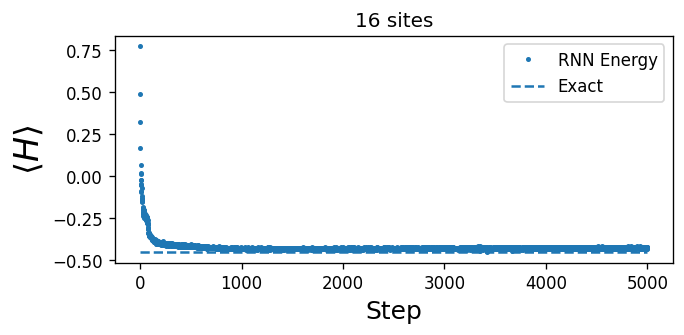

Final Energy -0.4262919889556037 (Exact Energy is -0.4534132086591546)
Final Error after 5000 epochs is 0.02712121970355086


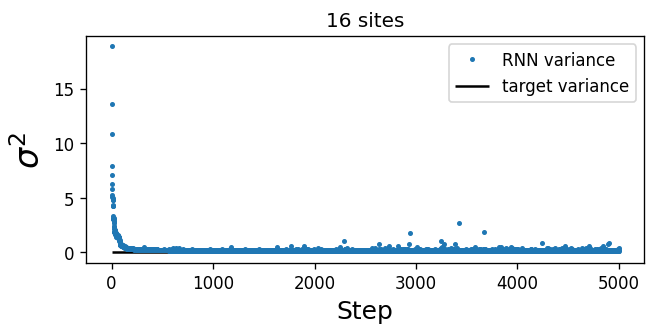

Final Variance after 5000 epochs is 0.20894222292635176


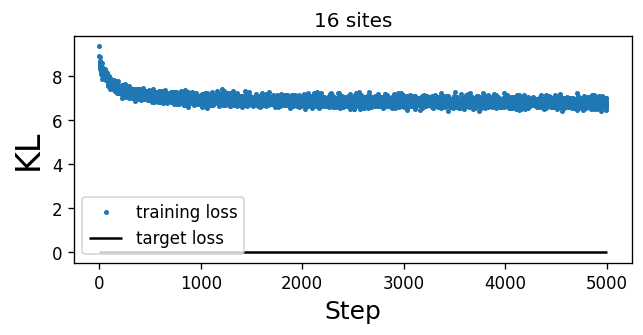

In [8]:
energy = []
variance = []
cost = []

def main():
    config = {
        # System Parameters
        'name': 'none',
        'Lx': 4,
        'Ly': 4,
        'V': 7,
        'Omega': 1.0,
        'delta': 1.0,
        'trunc': 100,
        
        # RNN & Training Parameters
        'RNN': 'OneD',
        'nh': 8, 
        'lr': 1e-3, 
        'weight_sharing': True,
        'seed': 1234,
        'epochs':5000,
        'ns': 1000,
        'batch_size': 100,
        
        # Etc
        'Print':True,
        'Write_Data': False,
        'Plot': True
        }
    
    return train_w_data(config,energy,variance,cost)


if __name__ == "__main__":
    model = main()